In [21]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
import pytesseract
%matplotlib inline

def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()
    
    
DIR = './vision/'

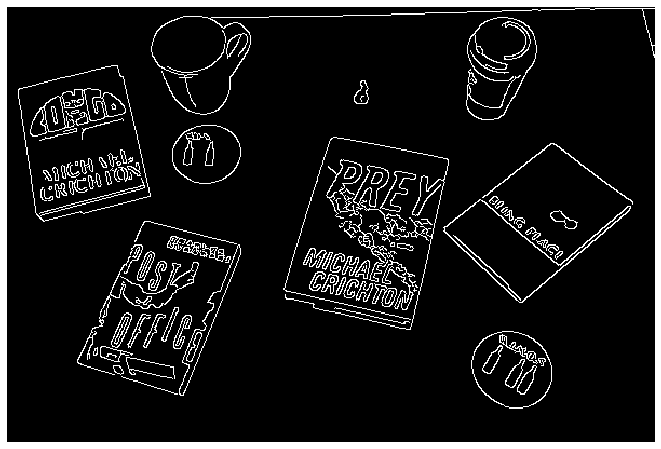

In [2]:
src = cv2.imread(DIR + 'book.jpg', 0)

img_bin = cv2.GaussianBlur(src, (3,3),0)
edged = cv2.Canny(img_bin, 10, 250)

imshow("",edged)

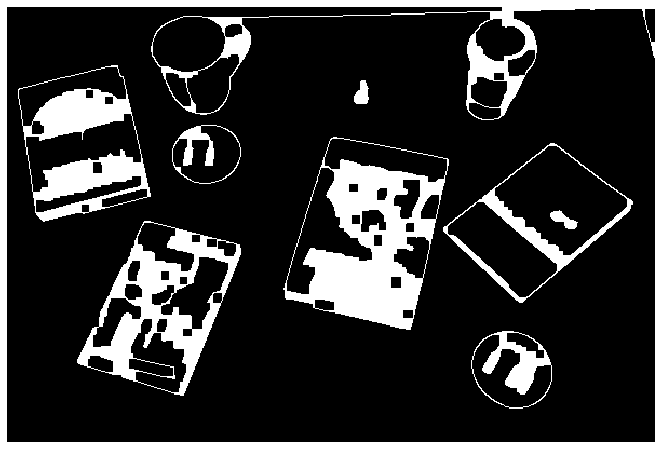

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations = 1)

imshow("", closed)

In [4]:
contours, _ =cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

8


8 4100.0
4 14438.5
4 13100.0
4 18798.0
8 2701.0
8 183.5
4 12816.5
10 11008.0


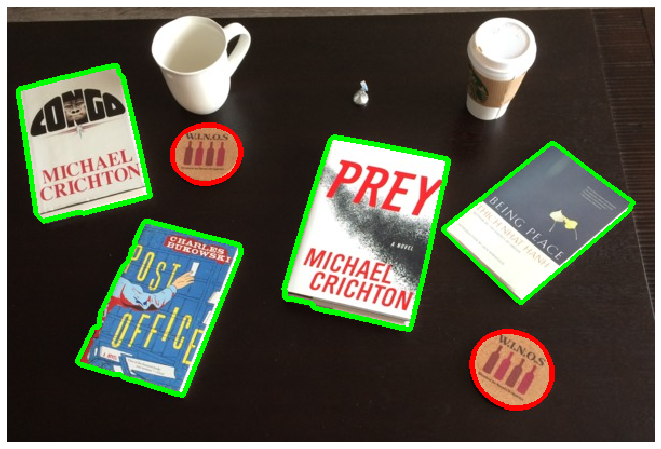

In [5]:
src = cv2.imread(DIR + 'book.jpg')

for cnt in contours :
    epsilon = cv2.arcLength(cnt, True) *0.02  
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    print(len(approx),area)
    if count == 4 :
        cv2.drawContours(src, [cnt], 0, (0, 255,0), 3)
    elif count == 8 and area > 200:
        cv2.drawContours(src, [cnt], 0, (0, 0,255), 3)
    
imshow("", src)      

## 다각형 피팅

### 타원 맵핑

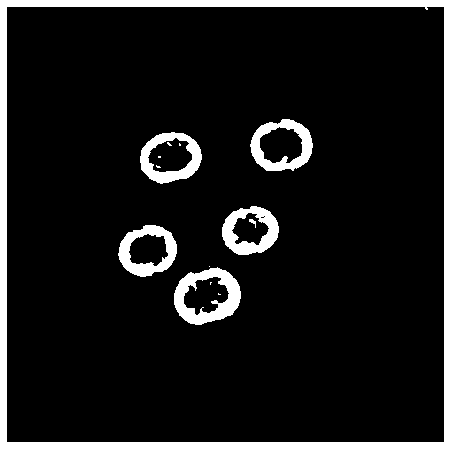

In [6]:
img = cv2.imread(DIR + 'coin.png',0)

gray_blur = cv2.GaussianBlur(img, (7,7),0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 45, 6)

imshow("", thresh)

((225.80030822753906, 326.933837890625), (60.931968688964844, 77.57230377197266), 73.75495147705078)
((158.7913818359375, 275.5298156738281), (55.34067916870117, 66.23458099365234), 74.6131591796875)
((274.4893493652344, 252.61375427246094), (53.25090026855469, 64.34342956542969), 78.42022705078125)
((184.22079467773438, 169.91505432128906), (55.9996223449707, 70.2265625), 77.4986801147461)
((310.2690734863281, 156.6083984375), (57.620994567871094, 71.02620697021484), 84.69145202636719)
((474.0, 1.0), (1.632993221282959, 2.8284270763397217), 135.0)


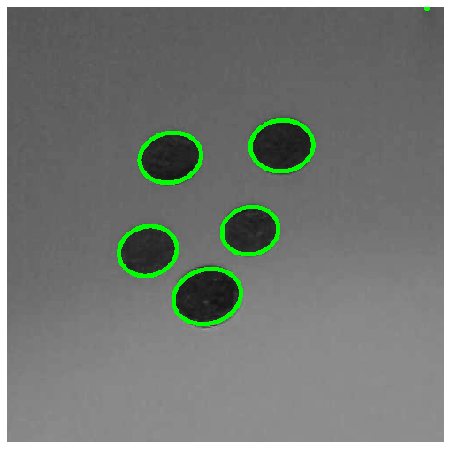

In [7]:
contours, _ =cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread(DIR + 'coin.png')

for cnt in contours :
    area = cv2.contourArea(cnt)
    
    if len(cnt) < 5 :
        continue
    ellipse = cv2.fitEllipse(cnt)
    print(ellipse)
    cv2.ellipse(src, ellipse,(0,255,0),3)
    
imshow("", src)      

## 손가락 검출

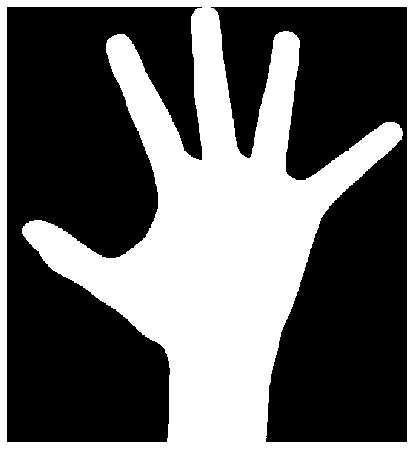

In [8]:
hand_img = cv2.imread(DIR + "5.jpg")

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0,23,0])
upper_band = np.array([255,189,255])

mask = cv2.inRange(hsv_img, lower_band,upper_band)

imshow("", mask)

1
345.5 362.71337890625 363.53997802734375


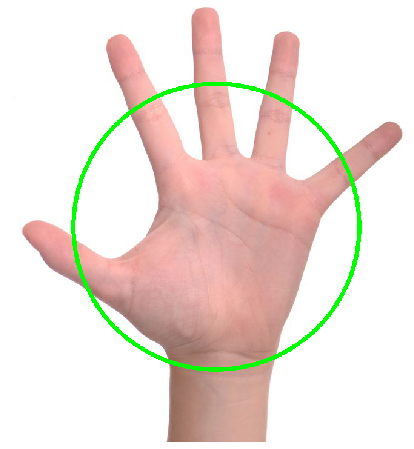

In [9]:
contours, _ =cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = contours[0]

print(len(contours))

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX,cY,r)

cv2.circle(hand_img, (int(cX), int(cY)), int(r*0.65), (0,255,0), 5 )

imshow("", hand_img)

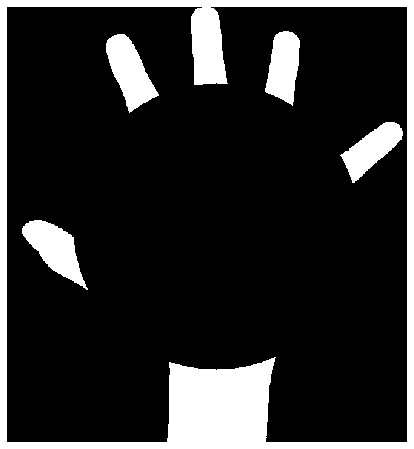

In [10]:
cv2.circle(mask, (int(cX), int(cY)), int(r*0.65), (0,255,0),-1)
imshow("",mask)

In [11]:
contours, _ =cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

for c in contours:
    area = cv2.contourArea(c)
    print(area)

7
20318.0
0.0
5606.0
4700.0
5758.5
4809.5
5989.0


In [12]:
contours[0]

array([[[443, 577]],

       [[442, 578]],

       [[441, 578]],

       [[440, 579]],

       [[438, 579]],

       [[437, 580]],

       [[436, 580]],

       [[435, 581]],

       [[433, 581]],

       [[432, 582]],

       [[431, 582]],

       [[430, 583]],

       [[428, 583]],

       [[427, 584]],

       [[426, 584]],

       [[425, 585]],

       [[423, 585]],

       [[422, 586]],

       [[420, 586]],

       [[419, 587]],

       [[417, 587]],

       [[416, 588]],

       [[413, 588]],

       [[412, 589]],

       [[410, 589]],

       [[409, 590]],

       [[406, 590]],

       [[405, 591]],

       [[403, 591]],

       [[402, 592]],

       [[398, 592]],

       [[397, 593]],

       [[394, 593]],

       [[393, 594]],

       [[389, 594]],

       [[388, 595]],

       [[383, 595]],

       [[382, 596]],

       [[376, 596]],

       [[375, 597]],

       [[367, 597]],

       [[366, 598]],

       [[346, 598]],

       [[345, 599]],

       [[344, 598]],

       [[3

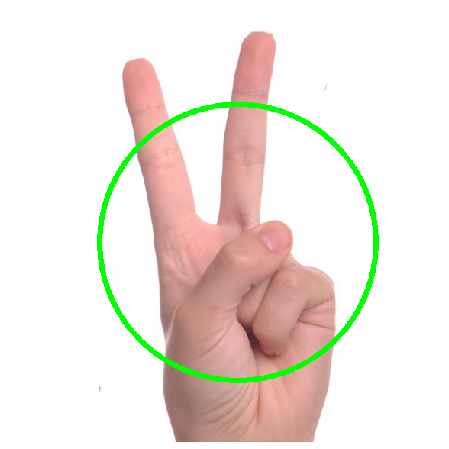

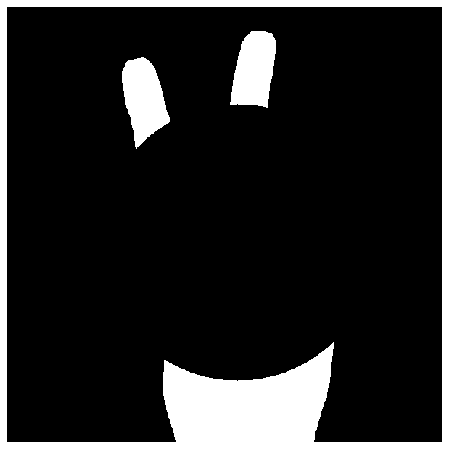

3
18666.0
4598.0
4382.0


In [13]:
hand_img = cv2.imread(DIR + "2.jpg")

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0,23,0])
upper_band = np.array([255,189,255])

mask = cv2.inRange(hsv_img, lower_band,upper_band)
mask = cv2.medianBlur(mask, 5)
contours, _ =cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = contours[0]

(cX, cY), r = cv2.minEnclosingCircle(c)
cv2.circle(hand_img, (int(cX), int(cY)), int(r*0.65), (0,255,0), 5 )

imshow("", hand_img)
cv2.circle(mask, (int(cX), int(cY)), int(r*0.65), (0,255,0),-1)
imshow("",mask)

contours, _ =cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

for c in contours:
    area = cv2.contourArea(c)
    print(area)

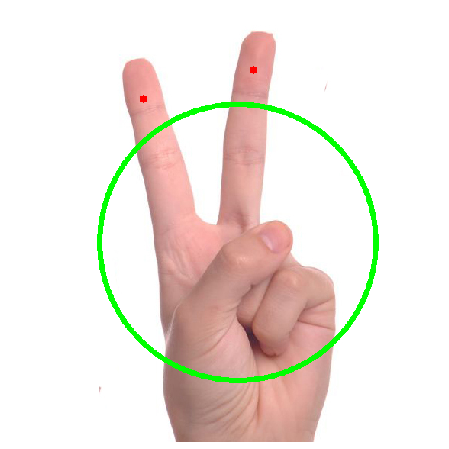

In [14]:
for c in contours:
    M = cv2.moments(c)

    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    if cY < 500:
        cv2.circle(hand_img, (int(cX),int(cY)),5, (0,0,255),-1)
imshow("", hand_img)

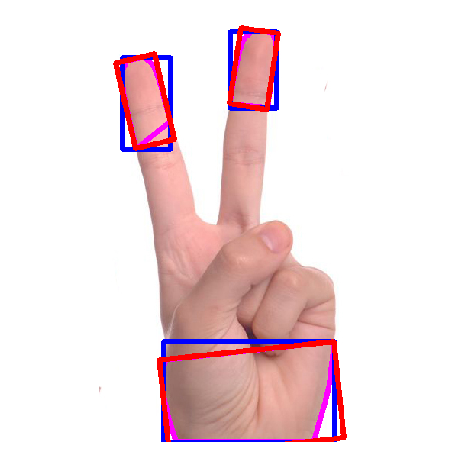

In [15]:
hand_img = cv2.imread(DIR + "2.jpg")

for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(hand_img, [hull], 0, (255,0,255),5)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(hand_img, (x,y),(x+w, y+h), (255,0,0), 5)
    
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(hand_img, [box], 0, (0,0,255),5)
    
imshow("", hand_img)

## 명함 추출

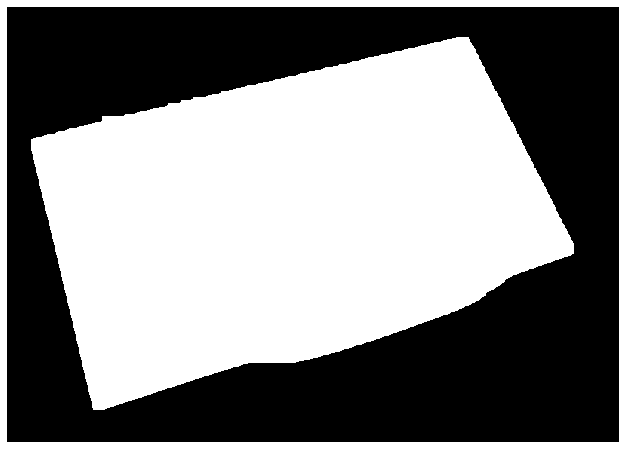

In [22]:
img = cv2.imread(DIR + 'namecard.png',0)
gray = cv2.GaussianBlur(img, (7, 7), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)
open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=10)

imshow("", closed )

In [23]:
contours, _ =cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = contours[0]

peri = cv2.arcLength(c,True)
approx = cv2.approxPolyDP(c,0.02*peri, True)
print(approx)

[[[611  40]]

 [[ 32 175]]

 [[114 534]]

 [[751 327]]]


In [24]:
def ordering(approx):
    ps = approx[:,0]
    cx = np.mean(ps[:,0])
    cy = np.mean(ps[:,1])
    pts = np.zeros((4,2), dtype = 'float32')
    for p in ps:
        sx = p[0] - cx
        sy = p[1] - cy
        if sx < 0 and sy < 0 : pts[0] = p
        if sx > 0 and sy < 0 : pts[1] = p
        if sx < 0 and sy > 0 : pts[2] = p
        if sx > 0 and sy > 0 : pts[3] = p
    return pts

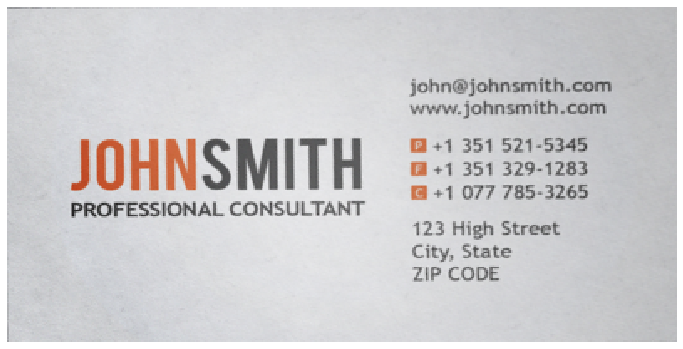

In [25]:
img = cv2.imread(DIR + 'namecard.png')

pts1 = ordering(approx)
pts2 = np.float32([[0,0],[400,0],[0,200],[400,200]])
M = cv2.getPerspectiveTransform(pts1, pts2)
img_result = cv2.warpPerspective(img,M,(400,200))


imshow("", img_result)

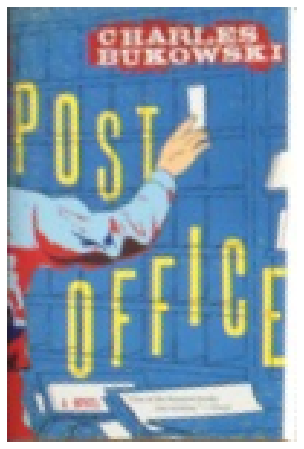

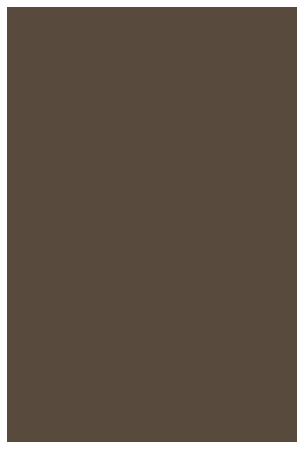

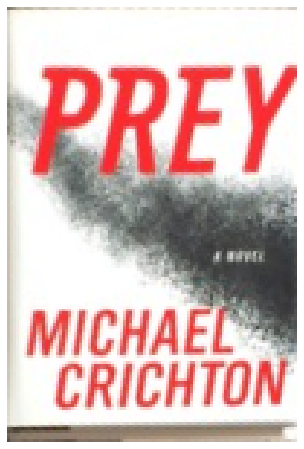

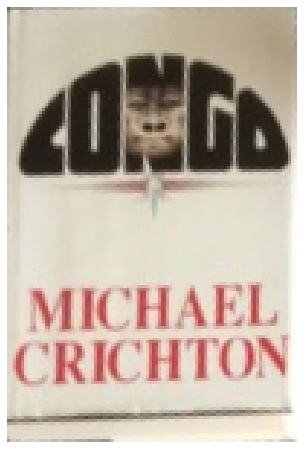

In [20]:
src = cv2.imread(DIR + 'book.jpg', 0)

img_bin = cv2.GaussianBlur(src, (3,3),0)
edged = cv2.Canny(img_bin, 10, 250)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations = 1)

contours, _ =cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread(DIR + 'book.jpg')

for cnt in contours :
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, peri*0.02, True)
    if len(approx) == 4:
        pts1 = ordering(approx)
        pts2 = np.float32([[0,0],[100,0],[0,150],[100,150]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        img_result = cv2.warpPerspective(src,M,(100,150))


        imshow("", img_result)


## OCR

In [27]:
img = cv2.imread(DIR + 'namecard.png',0)
gray = cv2.GaussianBlur(img, (7, 7), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)
open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=10)

contours, _ =cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = contours[0]

peri = cv2.arcLength(c,True)
approx = cv2.approxPolyDP(c,0.02*peri, True)

img = cv2.imread(DIR + 'namecard.png')

pts1 = ordering(approx)
pts2 = np.float32([[0,0],[400,0],[0,200],[400,200]])
M = cv2.getPerspectiveTransform(pts1, pts2)
img_result = cv2.warpPerspective(img,M,(400,200))

In [28]:
print(pytesseract.image_to_string(img_result))

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com.
‘www johnsmith.com

+1 351 521-5345
+1 351 329-1283,
(+1 077 785-3265,
123 High Street

City, State
ZIP CODE



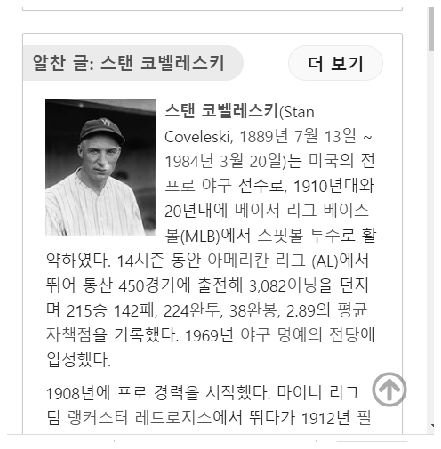

알찬 글: 스탠 코벨레스키          더 보기

스탠 코벨레스키(5130
00081650, 1889년 7월 13일 ~
1984년 3월 20일)는 미국의 전
프로 야구 선수로, 1910년대와
20년대에 메이저 리그 베이스
님             볼041Ｌ8)에서 스핏볼 투수로 활
약하였다. 14시즌 동안 아메리칸 리그 (41)에서
뛰어 통산 450경기에 출전해 3.082이닝을 던지
며 215승 142패, 224완투, 38완봉, 2.89의 평균
자책점을 기록했다. 1969년 야구 명예의 전당에

1908년에 프로 경력을 시작했다. 마이너 리그
팀 랭커스터 레드로지스에서 뛰다가 1912년 필



In [34]:
img = cv2.imread(DIR + 'htext.png',0)
imshow('',img)
print(pytesseract.image_to_string(img, lang='kor'))

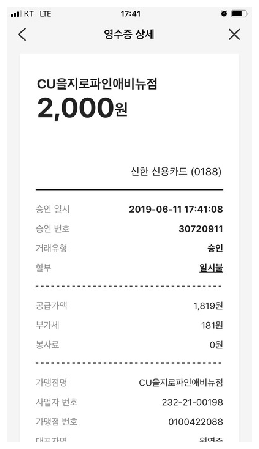

메17 내                7791

4             영수증 상세            .있

 

04을지로파인애비뉴점

2,000원

신한 신용카드 (0188)

 

승인 일시               2019-06-1117:41:08
30720911

승인

부                                   일시불

 

가맹점명                 .04을지로파인애비뉴점
사업자 번호                      232-21-00198
가맹점 번호                     0100422088

아오                      이 오



In [36]:
img = cv2.imread('./src/ocr.jpg',0)
imshow('',img)
print(pytesseract.image_to_string(img, lang='kor'))

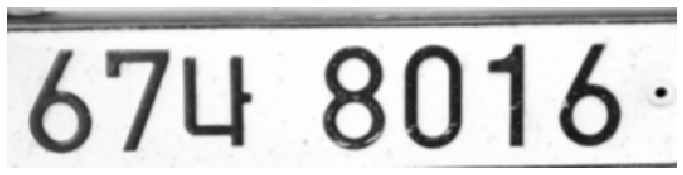

67나 8016ㆍ



In [50]:
img = cv2.imread(DIR + 'plate1.png',0)
img = cv2.GaussianBlur(img, (5,5),0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
imshow('',img)
print(pytesseract.image_to_string(binary, lang='kor'))

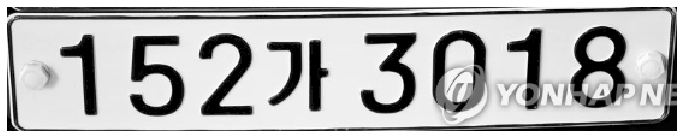

 

152가 3018

 



In [47]:
img = cv2.imread(DIR + 'plate2.png',0)
imshow('',img)
print(pytesseract.image_to_string(img, lang='kor'))

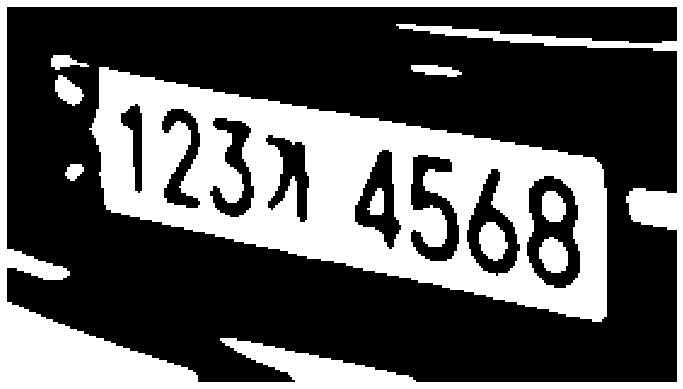

3 502.0
3 1326.0
6 145.0
5 257.0
8 28.5
8 76.0
4 12885.5


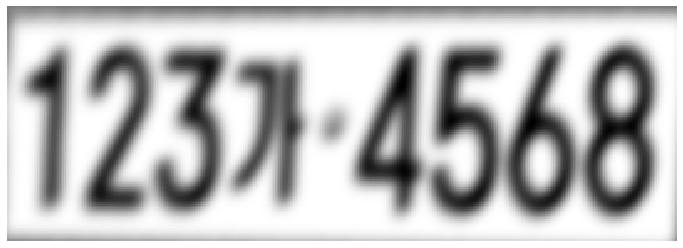

6 44.5
8 38.5
2 239.5


In [59]:
img = cv2.imread(DIR + 'plate3.png',0)

img = cv2.GaussianBlur(img, (11,11),0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

imshow('',binary)

contours, _ =cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for cnt in contours :
    peri = cv2.arcLength(cnt, True)
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, peri*0.02, True)
    print(len(approx), area)
    
    if area >= 10000 and len(approx) ==4:
        
        pts1 = ordering(approx)
        pts2 = np.float32([[0,0],[400,0],[0,140],[400,140]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        img_result = cv2.warpPerspective(img,M,(400,140))
        imshow("", img_result)


In [60]:
print(pytesseract.image_to_string(img_result, lang='kor'))

1231 4568



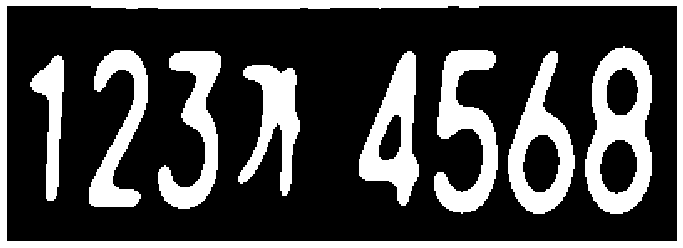

In [62]:
_, binary = cv2.threshold(img_result, 128, 255, cv2.THRESH_BINARY_INV)
imshow('',binary)

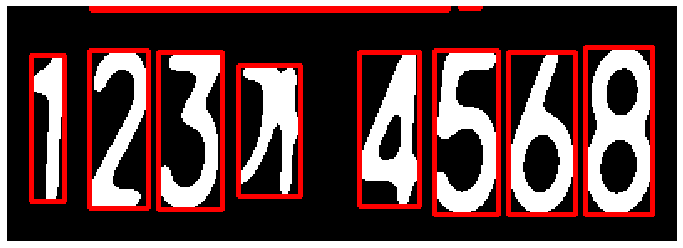

In [66]:
contours, _ =cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_color = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_color, (x,y),(x+w, y+h), (0,0,255), 2)
    
imshow("", img_color)